<b><font size=20, color='#A020F0'>Visualization and Mapping</font></b>

Hannah Zanowski<br>
10/17/22<br>

#### <span style="color:green">Learning Goals</span>
By the end of this notebook you will
1. Understand how to set up and create map projections using Cartopy
2. Practice intermediate and advanced plotting features in matplotlib
3. Learn the basic principles for creating good colormaps and be able to create your own colormap

#### Resources
Figure Layouts: <br>
[Arrange multiple axes in a figure](https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html#arranging-multiple-axes-in-a-figure): gridspec, subplot_mosaic, nested axes, etc<br>

Mapping:<br>
[Cartopy Documentation](https://scitools.org.uk/cartopy/docs/latest/)<br>
[Basemap](https://matplotlib.org/basemap/) 
><b>Note:</b> Basemap is deprecated now and cartopy is replacing it, but you can still use it for some things

Choosing colors:<br>
[Matplotlib built-in colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)<br>
[cmocean](https://matplotlib.org/cmocean/) colormaps for oceanographic data (this is in our class environment)!<br>
[Colorbrewer](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)<br>
[HTML color codes](https://htmlcolorcodes.com/color-picker/)<br>
[Chroma.js](https://gka.github.io/palettes/#/9|s|00429d,96ffea,ffffe0|ffffe0,ff005e,93003a|1|1)<br>
[Adobe color wheel](https://color.adobe.com/create/color-wheel)<br>
[Canva color wheel](https://www.canva.com/colors/color-wheel/)<br>
[Another colorpicker](http://tristen.ca/hcl-picker/#/hlc/12/1.09/461F24/DEB646)

Colorblindness Simulators:<br>
[Sim Daltonism](https://apps.apple.com/us/app/sim-daltonism/id693112260?mt=12) (Available for free in the Mac App Store)<br>
[Color Oracle](https://colororacle.org/)

A nice wrapper that puts many of the above together:<br>
[Proplot](https://proplot.readthedocs.io/en/stable/)

A few articles about choosing fonts:<br>
[Choosing fonts](https://gathercontent.com/blog/what-makes-a-good-accessible-easy-to-read-font)<br>
[Dyslexic-friendly fonts](http://dyslexiahelp.umich.edu/sites/default/files/good_fonts_for_dyslexia_study.pdf)

More about color theory:<br>
[Color matters](https://www.colormatters.com/color-and-design/basic-color-theory)<br>
[Work with color](http://www.workwithcolor.com/color-theory-introduction-4619.htm)<br>
[A color theory blog post](https://blog.hubspot.com/marketing/color-theory-design)

# A little about today's lecture

This entire lecture is about plotting things, mainly using cartopy for plotting geospatial data and making your plots look nicer by thinking a little bit about plot layouts as well as how we use color. The goal is to help give you a very general idea about some of the useful things you can do to make better visualizations than the defaults. I am not a graphic designer by any means, so unfortunately I can't give you a _ton_ of information about all of the ways in which you can make amazing plots, but I can help with some of the basics!

Let's begin by importing a few things including cartopy:

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#import os
#os.environ['PYPROJ_GLOBAL_CONTEXT']='ON'

---

## 1. Map projections with Cartopy
[Cartopy](https://scitools.org.uk/cartopy/docs/latest/index.html) is a python package originally developed by the UK Met office that is designed for plotting geospatial data on various map projections. Cartopy has [many built-in projections](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections) that you can choose from. Here are a few that you might find useful in your day-to-day work:

Text(0.5, 1.0, 'Equal Earth')

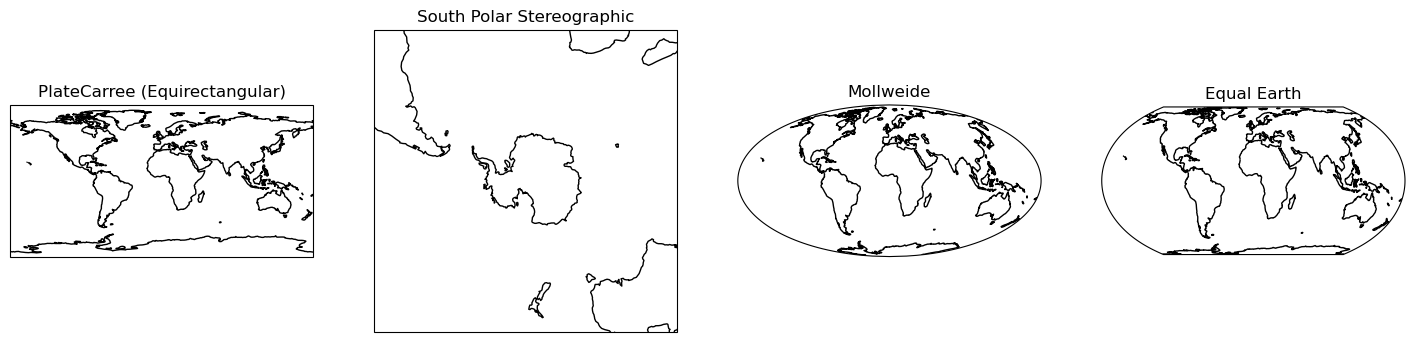

In [2]:
fig=plt.figure(figsize=(18,18))
ax1=fig.add_subplot(141,projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('PlateCarree (Equirectangular)')
ax2=fig.add_subplot(142,projection=ccrs.SouthPolarStereo())
ax2.coastlines()
ax2.set_extent([-180,180,-90,-30],ccrs.PlateCarree())
ax2.set_title('South Polar Stereographic')
ax3=fig.add_subplot(143,projection=ccrs.Mollweide())
ax3.coastlines()
ax3.set_title('Mollweide')
ax4=fig.add_subplot(144,projection=ccrs.EqualEarth())
ax4.coastlines()
ax4.set_title('Equal Earth')

### Understanding map projections
Not all map projections are created equal, and many of them _severely distort_ the sizes of the continents as a result. As it turns out, it's not particularly easy to take a 3D surface and flatten it to make it 2D without distorting some areas. This is always the struggle that we have when presenting geospatial data, but there are some map projections that can handle these issues better than others, depending on the coordinate system that they use. 

For example, the Mollweide and Equal Earth projections above are _equal area_ which means that area is preserved when creating the 2D map. These tend to show areas in the tropics particularly well, and they should, as the tropics cover a considerable amount of area on our planet! They don't show the polar regions well, but we can use other projections, like a polar stereographic projection, to present data in these regions instead. 

The PlateCarree projection is the typical projection that geospatial data sits on--it's the equirectangular lat/lon grid that you're already familiar with. However, because it is equirectangular, it is NOT area-preserving, and you can see this by the large distortion at the poles (Antarctica is big, but it's not _that_ big).

><b><font color='red'>Note:</font> In general, when presenting data on a global map, it is a good idea to avoid projections that severely distort certain regions, as it makes us think that these areas are larger than they are and as a result have an outsized influence on things when they don't!</b>

<b><font color='red' size=5>The one projection that you should avoid at all costs is the Mercator projection</font></b>

To get this point across, let's go to [The True Size Of...](https://thetruesize.com/), which is a website that allows you to compare the sizes of countries and continents on the planet!

Cartopy also allows you to plot [Tissot's Indicatrix](https://en.wikipedia.org/wiki/Tissot%27s_indicatrix#:~:text=In%20cartography%2C%20a%20Tissot's%20indicatrix,distortions%20due%20to%20map%20projection.) for its map projections, so you can see the distortion on a given map. An example of how to plot Tissot's Indicatrix is given [here](https://scitools.org.uk/cartopy/docs/latest/gallery/lines_and_polygons/tissot.html)

### Setting up a cartopy map projection
Cartopy is set up to [work smoothly with matplotlib](https://cartopy-pelson.readthedocs.io/en/readthedocs/matplotlib/intro.html). When you set up an axis for plotting, you need to specify the projection that you want so that matplotlib knows to treat your axis as a GeoAxes instance:

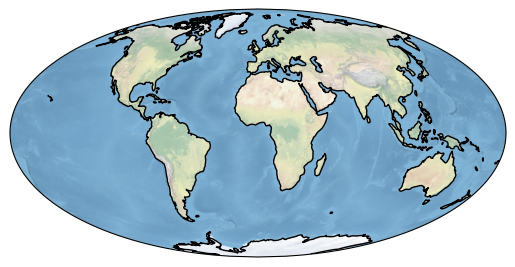

In [4]:
fig=plt.figure()
ax=fig.add_subplot(111,projection=ccrs.Mollweide())

#Add coastlines + stock image of planet
#ax.stock_img()
#ax.coastlines()

What is the type of ax?

In [ ]:
type(ax)

### Adding features
You can add several different [features](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html) to your map with `add_feature()`, including coastlines, land, ocean, rivers...

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection=ccrs.Mollweide())
ax.coastlines(color='k')
#add other features
#ax.add_feature(cfeature.LAND,color='tan')
#ax.add_feature(cfeature.OCEAN,color='lightblue')
#ax.add_feature(cfeature.RIVERS,edgecolor='navy')
#ax.add_feature(cfeature.BORDERS,ls='--',edgecolor='0.3')

### Map projections with multiple subplots
You can also set up multiple GeoAxes instances within `subplots()` by supplying the projection as a dictionary entry in `subplot_kw`:

In [ ]:
fig,ax=plt.subplots(1,2,subplot_kw={'projection':ccrs.Mollweide()})
ax[0].coastlines(color='k')
ax[1].coastlines(color='k')

If you wanted different projections for each subplot, you could add them individually:

In [ ]:
fig=plt.figure()
fig.set_size_inches(10,10)
ax1=fig.add_subplot(121,projection=ccrs.Mollweide())
ax2=fig.add_subplot(122,projection=ccrs.NearsidePerspective())
#ax1.coastlines(color='navy')
#ax2.coastlines(color='navy')
#ax2.gridlines();

### Plotting data with cartopy
When you plot data with cartopy, there are two important keywords that you should be aware of...
>1. <b><font color='darkmagenta'>projection:</font></b> the projection keyword tells cartopy which projection you want to use for your map
2. <b><font color='darkmagenta'>transform:</font></b> the transform keyword tells cartopy which projection (which coordinate system) _your data are currently in_

Let's read in the January 2m air temperature climatology from MERRA2 as an example:

In [ ]:
ds=xr.open_dataset('MERRA2.tavgC_2d_ltm_Nx.198101_201001.nc4')

In [ ]:
#Get the 2m air temperature
t2m=ds.T2MMEAN.isel(time=0)
#Set up the cartopy map axis:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection=ccrs.Orthographic(central_latitude=45,central_longitude=0)) #nrows, ncols, index
ax.coastlines(color='k')

#Plot the data
cs=ax.pcolormesh(ds.lon,ds.lat,t2m,cmap=plt.cm.magma) #transform=ccrs.PlateCarree()
cbar=plt.colorbar(cs)

---

## 2. Fine control over subplots and colorbars
Although the default subplot and colorbar setups in matplotlib are pretty decent, sometimes they just don't cut it. Maybe you want multiple subplots with different dimensions, or maybe you get annoyed that colorbars automatically steal space from the axis of your plot. When you reach this point, that's when things like [gridspec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib-gridspec-gridspec) and making your own colorbar axis are particularly useful.

### Using gridspec
As its name suggests, Gridspec sets up your plotting area as a grid. You can then add subplots to the grid in any way you want as long as they span a whole number of cells in that grid (the syntax is the same as if you are accessing a numpy array).

Here's an example of a plot from one of my papers ([Zanowski et al., 2021](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2020JC016930)) that I made using gridspec:

<center><img src='Images/ArcticFW_figure1.png' width='500'></img></center>

Let's set up a 4x4 gridspec as an example:

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
#set up the gridspec
gs=gridspec.GridSpec(nrows=4,ncols=4)
fig=plt.figure()
#Set up some axes within the gridspec
#In this case we are adding a suplot at each location, for a total of 16 subplots
axs=[fig.add_subplot(gs[j,i]) for j in range(0,4) for i in range(0,4)]

Now let's create a gridspec with a more complicated subplot layout:

In [ ]:
#set up the gridspec
gs=gridspec.GridSpec(nrows=4,ncols=4)

#Then set up some axes within the gridspec
fig=plt.figure()
ax1=fig.add_subplot(gs[0,0]) #upper left, single cell plot
ax2=fig.add_subplot(gs[0,1:]) #top row, spans three cells
ax3=fig.add_subplot(gs[1:3,0:2]) #two middle rows, first two cells each 
ax4=fig.add_subplot(gs[1:3,2:]) #two middle rows, last two cells each
ax5=fig.add_subplot(gs[3,:]) #last row, spans all four cells

#Annotate the subplots
axs=[ax1,ax2,ax3,ax4,ax5]
lbls=['Axis1', 'Axis2', 'Axis3', 'Axis4', 'Axis5']
for i,ax in enumerate(axs):
    ax.annotate(lbls[i], (0.5,0.5), xycoords='axes fraction', ha='center',va='center')

### Adding your own colorbar axis
Let's return to our 2m air temperature data for this example:

In [ ]:
#Set up the cartopy map axis:
fig=plt.figure()
ax=fig.add_subplot(111,projection=ccrs.Sinusoidal())

#Plot the data
cs=ax.pcolormesh(ds.lon,ds.lat,t2m,transform=ccrs.PlateCarree(),cmap=plt.cm.magma, shading='auto')
ax.coastlines(color='w')
plt.colorbar(cs)

This time let's set up our own colorbar:

In [ ]:
#Set up the cartopy map axis:
fig=plt.figure()
ax=fig.add_subplot(111,projection=ccrs.Sinusoidal())
#Plot the data
cs=ax.pcolormesh(ds.lon,ds.lat,t2m,transform=ccrs.PlateCarree(),cmap=plt.cm.magma, shading='auto')
ax.coastlines(color='w')

#add the colorbar
cax=fig.add_axes([0.22,0.14,0.59,0.04]) #Left, bottom, width, height
cbar=plt.colorbar(cs,cax=cax,orientation='horizontal') #the mappable, the colorbar axes, and the colorbar orientation

---

## 3. Choosing colors and creating your own colormaps
When choosing colors and colormaps, it's important to think about the colors you are using, how they work together, and whether or not they're appropriate for your data. In general, you want to choose colors and colormaps that... 

1. <b><font color='navy'>Make intuitive sense.</font></b> For example, if you were showing a plot of temperature anomalies with a Red-Blue colormap, you would want to make the positive anomalies red and the negative anomalies blue and not vice versa! We often inherently expect these things to be the case when looking at contour plots, so if things are different, we'll interpret the colors incorrectly _before_ looking closely at the data
2. <b><font color='navy'>Have continuous hue and as consistent luminance (brightness) and saturation as possible.</font></b> When luminance and saturation are inconsistent, it draws your eye to certain areas of the map, making some regions seem more important than others.
3. <b><font color='navy'>Are colorblind friendly</font></b> (red-green colorblindness is the most common type of colorblindness, but it [isn't the only one](https://www.nei.nih.gov/learn-about-eye-health/eye-conditions-and-diseases/color-blindness/types-color-blindness)!)
4. <b><font color='navy'>Are complementary</font></b> (i.e., opposite to each other on the [color wheel](https://www.canva.com/colors/color-wheel/)). Complementary colors bring each other out! Do note though that some complementary color schemes like red-green are a no go for colorblindness.

Below is an example of the 'jet' colormap, <b><font color='red' size=5><u>_which you should never use_</u></b></font> (or any of its variants) because it [violates many of the above principles](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/):

In [ ]:
#Set up the cartopy map axis:
fig=plt.figure()
ax=fig.add_subplot(111,projection=ccrs.PlateCarree())
#Plot the data
cs=ax.pcolormesh(ds.lon,ds.lat,t2m,transform=ccrs.PlateCarree(),cmap=plt.cm.jet, shading='auto')
ax.coastlines(color='k')
plt.colorbar(cs,orientation='horizontal')

### Creating your own colormap
Sometimes the default colormaps in matlpotlib don't cover what you need, or they have issues like 'jet.' You can get around this by creating your own colormaps. There are many ways to [create colormaps in matplotlib](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html), so here I'll show you an example of building a [ListedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html) from a set of colors chosen from the [chroma.js color palette helper](https://gka.github.io/palettes/#/9|s|00429d,96ffea,ffffe0|ffffe0,ff005e,93003a|1|1):

In [ ]:
import matplotlib.colors as mplc

In [ ]:
#set up your colormap
cmap=mplc.ListedColormap(['your colors here'])
#['#008d95', '#499a99', '#6da89d', '#8bb6a1', '#a6c4a7', '#c0d2ae', '#d8e0b7', '#efefc4', '#ffffe0']

In [ ]:
#Set up the cartopy map axis:
fig=plt.figure()
ax=fig.add_subplot(111,projection=ccrs.Robinson())

#Plot the data
cs=ax.contourf(ds.lon,ds.lat,t2m,transform=ccrs.PlateCarree(),cmap=cmap,levels=np.arange(230,321,10))
ax.coastlines(color='k')
plt.colorbar(cs,orientation='horizontal')

---

## 4. Choosing fonts
Good figures should also be _legible_ which means you need to think about font size, weight, and type! This is sort of an art form, and different people will tell you different things about what matters and what doesn't. In most cases, the default python figure font works fine, but keep in mind that journals will often require you to use a specific subset of fonts for figures, etc. There are also some fonts that are more friendly to those with dyslexia, so it's good to know some decent ones that you can use. 

There are two 'classes' of fonts: [serif and sans-serif](https://www.canva.com/learn/serif-vs-sans-serif-fonts/). 

><b><font color='blue'>Note: </font></b>In general sans-serif fonts are better for dyslexic readers and are easier to read on-screen, and serif fonts are easier to read on paper. <u>Of course, this isn't always the case, but it's a good rule of thumb.</u>

Below we'll practice changing the font of one of our maps:

In [ ]:
#Set up the cartopy map axis:
fig=plt.figure()
ax=fig.add_subplot(111,projection=ccrs.Sinusoidal())
#Plot the data
cs=ax.pcolormesh(ds.lon,ds.lat,t2m,transform=ccrs.PlateCarree(),cmap=plt.cm.magma, shading='auto')
ax.coastlines(color='w')
#add title
ax.set_title('Jan 2m Air Temperature',font='Baskerville') #font='Avenir'

#add the colorbar
cax=fig.add_axes([0.22,0.14,0.59,0.04]) #Left, bottom, width, height
cbar=plt.colorbar(cs,cax=cax,orientation='horizontal')

><b><font color='red'>Note: </font></b> If you are getting an error of the form `font [xx] not found. Falling back to DejaVu Sans`, this is an issue with the Jupyterhub (it was also an issue on the AOS Jupyterhub). You should theoretically be able to solve the problem with the steps below, but even this is finicky sometimes!
>In a terminal in your home directory run the following commands:  
>```bash
bash
rm ~/.cache/matplotlib -rf
conda activate aos573
python
import matplotlib.font_manager
exit()
```

You can also set the default font for your matplotlib figures with [rc params](https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-matplotlib-with-style-sheets-and-rcparams). If you want the default font to be the same across all notebook sessions, you need to add these commands to your [matplotlibrc file](https://matplotlib.org/stable/tutorials/introductory/customizing.html#the-default-matplotlibrc-file)

In [ ]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif']= 'arial'

In [ ]:
#Set up the cartopy map axis:
fig=plt.figure()
ax=fig.add_subplot(111,projection=ccrs.Sinusoidal())
#Plot the data
cs=ax.pcolormesh(ds.lon,ds.lat,t2m,transform=ccrs.PlateCarree(),cmap=plt.cm.magma, shading='auto')
ax.coastlines(color='w')
#add title
ax.set_title('Jan 2m Air Temperature')

#add the colorbar
cax=fig.add_axes([0.22,0.14,0.59,0.04]) #Left, bottom, width, height
cbar=plt.colorbar(cs,cax=cax,orientation='horizontal')

---